## Feature Scaling

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Scaling to quantiles and median**.

=================================================================

## Scaling to quantiles and median - RobustScaling

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

This robust scaling method produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers.

In a nutshell, RobustScaling:

- centers the median at 0
- variance varies across variables
- may not preserve the shape of the original distribution
- the minimum and maximum values vary.
- robust outliers


## In this demo

We will perform robust scaling using Scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split


# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

3.DATASET
The dataset for this paper has been obtained 
from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Automobile).

This data set consists of three types of entities: (a) the specification of an auto in terms of various 
characteristics, (b)its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates.
Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky 
(or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process 
“symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized 
for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…),
and represents the average loss per car per year.

There are total 205 instances and 26 attributes out of which 15 are continuous, 1 is integer and 
10 are nominal. There are missing values as well.

In [2]:
# let's load the imports-85-clean-data.csv dataset

data = pd.read_csv('C:\\Users\\gusal\\machine learning\\Feature engineering\\automobile data set\\imports-85-clean-data.csv')


In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,128.576317,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,104.848780,5125.369458,25.219512,30.751220,13321.278623
std,1.245307,38.606463,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,39.969861,476.979093,6.542142,6.886443,8095.996440
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,125.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. Note for this demo, how **the 75th and 25th quantiles are quite different in the different variables**.

When performing robust  absolute scaling of the data set, we need to first identify the median and quantiles of the variables. These parameters need to be learned from the train set, stored, and then used to scale test and future data. Thus, we will first divide the data set into train and test, as we have done throughout the course.

In [4]:
data.dtypes


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [5]:
inputs = data.drop(['price'], axis = 1)
target = data.price

In [6]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((143, 25), (62, 25))

# we need to identify the numerical variables that to be Scaled

In [7]:
# find numerical variables
#those different from object and also excluding the target Price
features_numerical = [c for c in data.columns if data[c].dtypes!='O' and c !='price']

In [8]:
features_numerical

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [9]:
X_train_temp = X_train[features_numerical]
X_test_temp = X_test[features_numerical]


### RobustScaling

The MaxAbsScaler from scikit-learn re-scales features to their maximum value, so that the new maximum value is 1. 

In [10]:
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_temp )

# transform train and test sets
X_train_scaled = scaler.transform(X_train_temp )
X_test_scaled = scaler.transform(X_test_temp)

In [11]:
# the scaler stores the median values of the features as learned from train set
scaler.center_

array([0.000e+00, 1.190e+02, 9.690e+01, 1.732e+02, 6.540e+01, 5.410e+01,
       2.414e+03, 1.200e+02, 3.310e+00, 3.290e+00, 9.000e+00, 9.500e+01,
       5.100e+03, 2.400e+01, 3.000e+01])

In [12]:
# the scaler stores the IQR values of the features as learned from train set

scaler.scale_

array([1.500e+00, 5.800e+01, 7.900e+00, 1.755e+01, 2.800e+00, 3.600e+00,
       7.850e+02, 4.800e+01, 4.500e-01, 2.850e-01, 8.000e-01, 4.300e+01,
       7.000e+02, 1.000e+01, 9.000e+00])

In [13]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_temp.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_temp.columns)

In [14]:
# let's have a look at the original training dataset: median values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train.median(), 1)

symboling               0.0
normalized-losses     119.0
wheel-base             96.9
length                173.2
width                  65.4
height                 54.1
curb-weight          2414.0
engine-size           120.0
bore                    3.3
stroke                  3.3
compression-ratio       9.0
horsepower             95.0
peak-rpm             5100.0
city-mpg               24.0
highway-mpg            30.0
dtype: float64

In [15]:
# let's have a look at the scaled training dataset: median values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.median(), 1)

symboling            0.0
normalized-losses    0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-size          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
dtype: float64

The variables were centered to the median values.

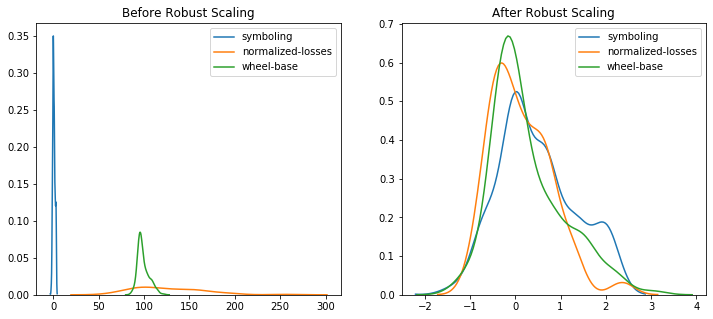

In [16]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Robust Scaling')
sns.kdeplot(X_train_temp['symboling'], ax=ax1)
sns.kdeplot(X_train_temp['normalized-losses'], ax=ax1)
sns.kdeplot(X_train_temp['wheel-base'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['symboling'], ax=ax2)
sns.kdeplot(X_train_scaled['normalized-losses'], ax=ax2)
sns.kdeplot(X_train_scaled['wheel-base'], ax=ax2)
plt.show()

The median of the distributions are centered at zero, but every other parameter may vary in the different variables. It does, though, squeeze the value range in the original variables, particularly for those highly skewed.

In [17]:
X_train_scaled.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

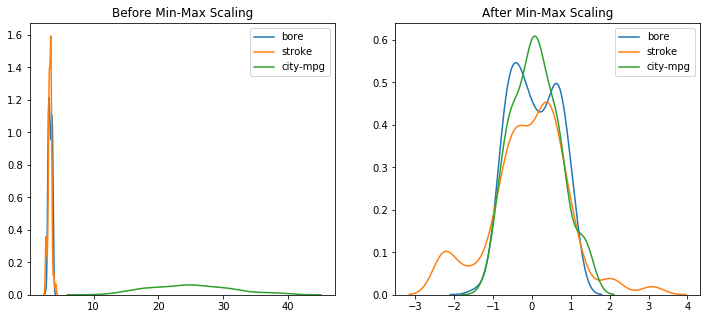

In [18]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Min-Max Scaling')
sns.kdeplot(X_train_temp['bore'], ax=ax1)
sns.kdeplot(X_train_temp['stroke'], ax=ax1)
sns.kdeplot(X_train_temp['city-mpg'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['bore'], ax=ax2)
sns.kdeplot(X_train_scaled['stroke'], ax=ax2)
sns.kdeplot(X_train_scaled['city-mpg'], ax=ax2)
plt.show()

Compare this scaling with mean normalisation, to see how this procedure affects the distribution shape.

Adding the categorical variables to X_train_scaled and X_test_scaled

In [19]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in data.columns if data[c].dtypes=='O']

In [20]:
features_categorical

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [21]:
X_train_scaled = X_train_scaled.set_index(X_train.index)

In [22]:
X_train_scaled[features_categorical] = X_train[features_categorical]

In [23]:
X_train_scaled

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
40,0.000000,-0.586207,-0.050633,0.125356,-1.035714,0.000000,-0.053503,-0.208333,-0.355556,1.017544,...,honda,gas,std,four,sedan,fwd,front,ohc,four,1bbl
60,0.000000,-0.068966,0.240506,0.262108,0.392857,0.388889,-0.005096,0.041667,0.177778,0.350877,...,mazda,gas,std,four,sedan,fwd,front,ohc,four,2bbl
56,2.000000,0.534483,-0.202532,-0.239316,0.107143,-1.250000,-0.043312,-1.041667,-0.511111,-0.491228,...,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
101,0.000000,0.155172,0.443038,0.484330,0.392857,0.277778,0.867516,1.270833,0.266667,-0.070175,...,nissan,gas,std,four,sedan,fwd,front,ohcv,six,mpfi
86,0.666667,0.103448,-0.075949,-0.045584,0.000000,-0.694444,-0.011465,0.041667,0.088889,0.596491,...,mitsubishi,gas,std,four,sedan,fwd,front,ohc,four,2bbl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-0.666667,-0.448276,1.658228,1.008547,1.750000,0.666667,1.402548,1.312500,0.600000,1.228070,...,mercedes-benz,diesel,turbo,four,sedan,rwd,front,ohc,five,idi
192,0.000000,2.362069,0.443038,0.398860,0.535714,0.277778,0.210191,-0.479167,-0.666667,0.385965,...,volkswagen,diesel,turbo,four,sedan,fwd,front,ohc,four,idi
117,0.000000,0.724138,1.405063,0.769231,1.035714,0.527778,0.912102,0.291667,0.666667,-0.280702,...,peugot,gas,turbo,four,sedan,rwd,front,l,four,mpfi
47,0.000000,0.448276,2.037975,1.504274,1.500000,-0.361111,2.104459,2.875000,0.711111,3.087719,...,jaguar,gas,std,four,sedan,rwd,front,dohc,six,mpfi


In [24]:
X_test_scaled = X_test_scaled.set_index(X_test.index)

In [25]:
X_test_scaled[features_categorical] = X_test[features_categorical]

In [26]:
X_test_scaled

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
52,0.666667,-0.258621,-0.481013,-0.803419,-0.428571,0.000000,-0.648408,-0.604167,-0.622222,-0.491228,...,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
181,-0.666667,-0.500000,0.962025,0.831909,0.392857,0.000000,0.938854,0.854167,-0.088889,0.210526,...,toyota,gas,std,four,wagon,rwd,front,dohc,six,mpfi
5,1.333333,0.775862,0.367089,0.233618,0.321429,-0.277778,0.118471,0.333333,-0.266667,0.385965,...,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
18,1.333333,0.034483,-1.075949,-1.829060,-1.821429,-0.250000,-1.179618,-1.229167,-0.888889,-0.912281,...,chevrolet,gas,std,two,hatchback,fwd,front,l,three,2bbl
188,1.333333,-0.431034,0.050633,-0.085470,0.035714,0.444444,-0.145223,-0.229167,-0.266667,0.385965,...,volkswagen,gas,std,four,sedan,fwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1.333333,-0.275862,0.936709,0.888889,0.642857,0.583333,0.803822,0.208333,0.688889,-0.491228,...,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
143,0.000000,-0.293103,0.037975,-0.068376,0.000000,-0.444444,-0.094268,-0.250000,0.688889,-2.280702,...,subaru,gas,std,four,sedan,fwd,front,ohcf,four,mpfi
24,0.666667,0.500000,-0.405063,-0.905983,-0.571429,-0.972222,-0.569427,-0.625000,-0.755556,-0.210526,...,dodge,gas,std,four,hatchback,fwd,front,ohc,four,2bbl
30,1.333333,0.310345,-1.303797,-1.629630,-0.535714,-0.916667,-0.892994,-0.583333,-0.888889,0.421053,...,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
